In [ ]:
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
from zipfile import ZipFile

# Menentukan nama file zip
file_name = "/content/drive/MyDrive/Pengolahan Citra Digital/archive.zip"

# Menentukan direktori target
target_directory = "/content/drive/MyDrive/Pengolahan Citra Digital"

# Membuat direktori target jika belum ada
os.makedirs(target_directory, exist_ok=True)

# Membuka file zip dalam mode READ
with ZipFile(file_name, 'r') as zip:
  # Mencetak semua isi file zip
  zip.printdir()

  # Mengekstrak semua file ke direktori target
  print('Extracting all the files now...')
  zip.extractall(target_directory)
  print('Done!')

File Name                                             Modified             Size
dataset/traffic_malam/Screenshot (109).png     2023-12-21 03:30:24      1428795
dataset/traffic_malam/Screenshot (117).png     2023-12-21 03:30:24      1428061
dataset/traffic_malam/Screenshot (12).png      2023-12-21 03:30:24      2001440
dataset/traffic_malam/Screenshot (125).png     2023-12-21 03:30:24      1467019
dataset/traffic_malam/Screenshot (13).png      2023-12-21 03:30:24      1764371
dataset/traffic_malam/Screenshot (132).png     2023-12-21 03:30:24      1467953
dataset/traffic_malam/Screenshot (137).png     2023-12-21 03:30:24      1416168
dataset/traffic_malam/Screenshot (138).png     2023-12-21 03:30:24      1441436
dataset/traffic_malam/Screenshot (139).png     2023-12-21 03:30:24      1499693
dataset/traffic_malam/Screenshot (140).png     2023-12-21 03:30:24      1482514
dataset/traffic_malam/Screenshot (20).png      2023-12-21 03:30:24      1377003
dataset/traffic_malam/Screenshot (22).pn

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

*   Mengelola file dan direktori (os).
*   Melakukan operasi numerik dan komputasi ilmiah (numpy).
*   Membuat dan menampilkan visualisasi data (matplotlib).
*   Membaca, memanipulasi, dan menampilkan gambar (matplotlib.image, cv2, PIL.Image).
*   Membagi dataset untuk pelatihan dan pengujian (train_test_split).

In [ ]:
traffic_siang_files = os.listdir('/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang')
print(traffic_siang_files[0:5])
print(traffic_siang_files[-5:])

traffic_malam_files = os.listdir('/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam')
print(traffic_malam_files[0:5])
print(traffic_malam_files[-5:])

['download (30).jpg', 'download (31).jpg', 'download (32).jpg', 'download (33).jpg', 'download (34).jpg']
['download (89).jpg', 'download (90).jpg', 'download36.jpg', 'download44.jpg', 'download50.jpg']
['Screenshot (109).png', 'Screenshot (117).png', 'Screenshot (12).png', 'Screenshot (125).png', 'Screenshot (13).png']
['download (9).jpg', 'download.jpg', 'download2.jpg', 'download25.jpg', 'download4.jpg']


*   Membaca dan menyimpan daftar nama file dari dua direktori berbeda yang berisi gambar lalu lintas pada siang dan malam hari.
*   Menggunakan fungsi os.listdir() untuk membaca semua nama file di dalam direktori
*   Menampilkan lima file pertama dan lima file terakhir dari masing-masing direktori untuk memeriksa dan memverifikasi isi direktori tersebut.

In [ ]:
print('Number of images traffic siang:', len(traffic_siang_files))

print('Number of images traffic malam:', len(traffic_malam_files))

Number of images traffic siang: 60
Number of images traffic malam: 55


In [ ]:
traffic_siang_labels = [1]*len(traffic_siang_files)

traffic_malam_labels = [1]*len(traffic_malam_files)

print(traffic_siang_labels[0:5])

print(traffic_malam_labels[0:5])

print(len(traffic_siang_labels))

print(len(traffic_malam_labels))

[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
60
55


In [ ]:
# combining both the list to a single list

combined_labels = traffic_siang_labels + traffic_malam_labels

print(len(traffic_siang_labels))

print(traffic_siang_labels[0:5])

print(traffic_malam_labels[-5:])

60
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


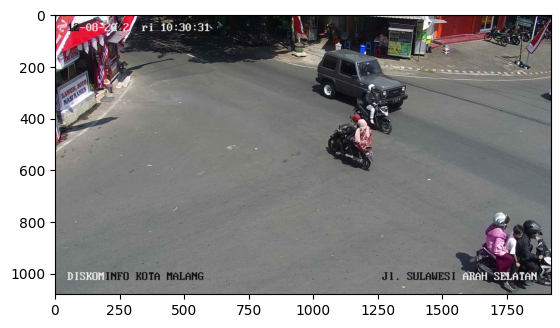

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/download (30).jpg')
imgplot = plt.imshow(img)

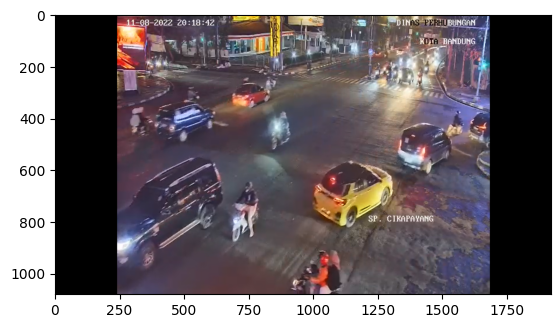

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/Screenshot (12).png')
imgplot = plt.imshow(img)

In [ ]:
traffic_siang_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/'
traffic_malam_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/'

dataset = []

for img_file in traffic_siang_files:
    image = Image.open(traffic_siang_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    dataset.append(image)

for img_file in traffic_malam_files:
    image = Image.open(traffic_malam_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    dataset.append(image)

In [ ]:
len(dataset)

115

array([[[202, 187, 196],
        [170,  85,  88],
        [170,  63,  72],
        ...,
        [ 41,  48,  46],
        [ 23,  24,  21],
        [ 16,  14,  20]],

       [[177, 148, 155],
        [157,  60,  71],
        [166,  59,  70],
        ...,
        [ 25,  23,  34],
        [ 27,  27,  31],
        [ 21,  22,  26]],

       [[155, 103, 113],
        [163,  76,  99],
        [162,  75,  88],
        ...,
        [ 25,  22,  33],
        [ 20,  20,  26],
        [ 51,  48,  50]],

       ...,

       [[114, 119, 122],
        [115, 120, 120],
        [115, 121, 120],
        ...,
        [123, 128, 132],
        [123, 128, 132],
        [122, 127, 131]],

       [[116, 121, 125],
        [114, 120, 119],
        [118, 124, 122],
        ...,
        [123, 128, 132],
        [124, 129, 133],
        [123, 128, 132]],

       [[117, 122, 126],
        [115, 120, 124],
        [119, 125, 124],
        ...,
        [123, 128, 132],
        [123, 128, 132],
        [123, 128, 132]]], dtype=uint8)
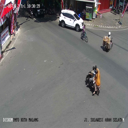

In [ ]:
dataset[1]

In [ ]:
type(dataset[1])

numpy.ndarray

In [ ]:
X = np.array(dataset)

y = np.array(combined_labels)

print(type(X), type(y))

print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(115, 128, 128, 3) (115,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(115, 128, 128, 3) (92, 128, 128, 3) (23, 128, 128, 3) (115,) (92,) (23,)


In [ ]:
#sclaing the data
X_train_scaled = X_train / 2
X_test_scaled = X_test / 2

In [ ]:
import tensorflow as tf
from tensorflow import keras

no_of_classes = 2

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 11.1797 - acc: 0.7195 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/10
3/3 [==============================] - 2s 587ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/10
3/3 [==============================] - 2s 614ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 594ms/step - loss: 13.4215 - acc: 0.9878 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
3/3 [==============================] - 2s 575ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 607ms/step - loss: 2.0732 - acc: 0.9878 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 794ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
3/3 [==============================]

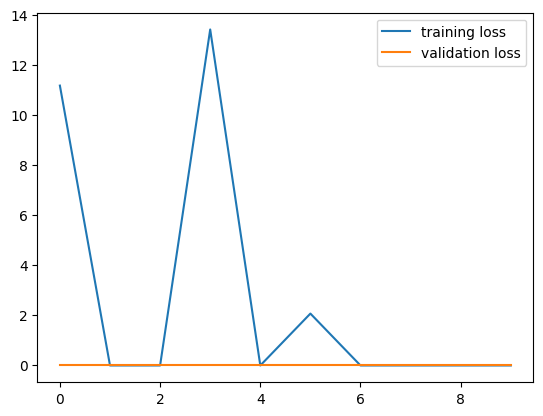

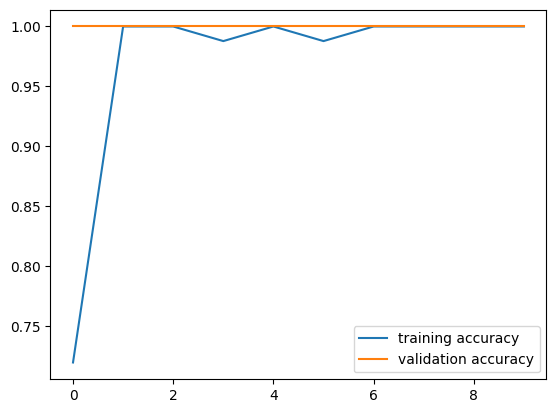

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

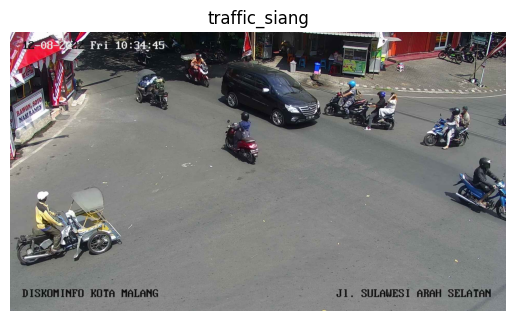

1/1 [==============================] - 0s 27ms/step
Prediction: [[1.3936942e-13 1.0000000e+00]]
Predicted Label: 1
The image contains a motor vehicle.


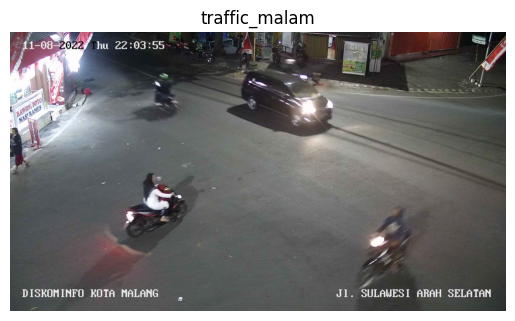

1/1 [==============================] - 0s 28ms/step
Prediction: [[4.122352e-11 1.000000e+00]]
Predicted Label: 1
The image contains a motor vehicle.


In [ ]:
day_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/download (48).jpg'
night_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/download (10).jpg'

def process_and_predict(image_path):
    # Membaca dan menampilkan gambar yang diinput
    input_image = mpimg.imread(image_path)
    plt.imshow(input_image)
    plt.title(f'{image_path.split("/")[-2]}')
    plt.axis('off')
    plt.show()

    # Proses gambar
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Melakukan prediksi
    input_prediction = model.predict(input_image_reshaped)
    print(f'Prediction: {input_prediction}')

    # Interpretasi hasil prediksi
    input_pred_label = np.argmax(input_prediction)
    print(f'Predicted Label: {input_pred_label}')

    # Asumsi label 1 adalah kendaraan motor
    if input_pred_label == 1:
        print('The image contains a motor vehicle.')
    else:
        print('The image does not contain a motor vehicle.')

# Proses prediksi untuk gambar traffic siang
process_and_predict(day_image_path)

# Proses prediksi untuk gambar traffic malam
process_and_predict(night_image_path)

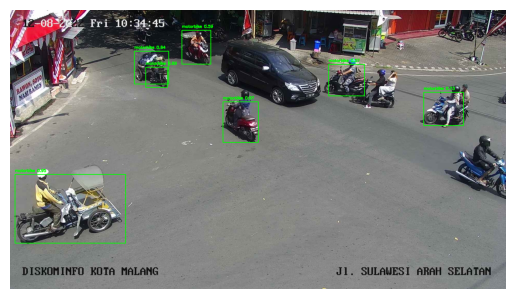

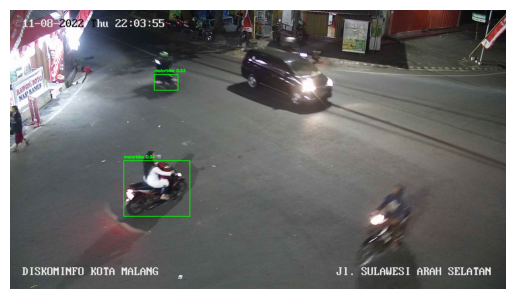

In [ ]:
# Path ke model YOLO
cfg_path = '/content/drive/MyDrive/Pengolahan Citra Digital/model/yolov3.cfg'
weights_path = '/content/drive/MyDrive/Pengolahan Citra Digital/model/yolov3.weights'
names_path = '/content/drive/MyDrive/Pengolahan Citra Digital/model/coco.names'

# Cek apakah file 'coco.names' ada
import os
if not os.path.isfile(names_path):
    raise FileNotFoundError(f"File not found at {names_path}")

# Muat kelas
with open(names_path, 'r') as f:
    classes = f.read().strip().split('\n')

# Muat model YOLO
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

def detect_motor(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preproses gambar untuk YOLO
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Lakukan forward pass dan dapatkan deteksi
    detections = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for out in detections:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if class_id == classes.index("motorbike") and confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Konversi gambar BGR ke RGB untuk Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Definisikan path untuk gambar input
day_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/download (48).jpg'
night_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/download (10).jpg'

# Deteksi motor pada gambar traffic siang
detect_motor(day_image_path)

# Deteksi motor pada gambar traffic malam
detect_motor(night_image_path)

In [ ]:
# Instalasi pustaka yang diperlukan
!pip install ultralytics
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Impor pustaka yang diperlukan
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


0: 384x640 9 persons, 1 car, 9 motorcycles, 185.1ms
Speed: 3.5ms preprocess, 185.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


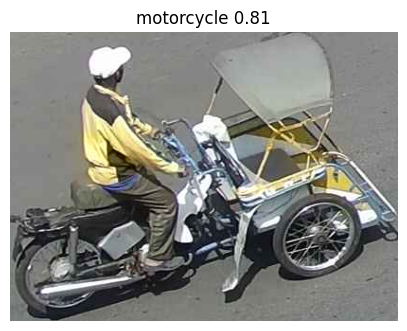

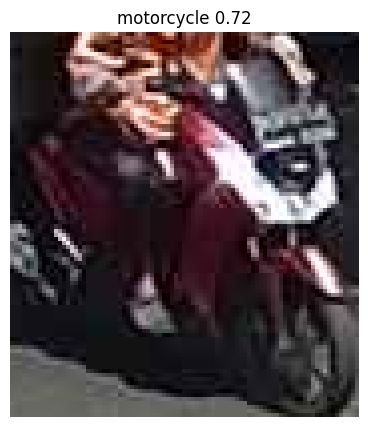

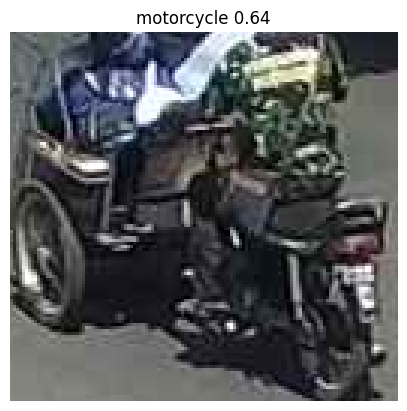

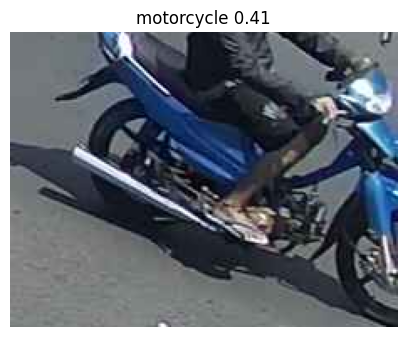

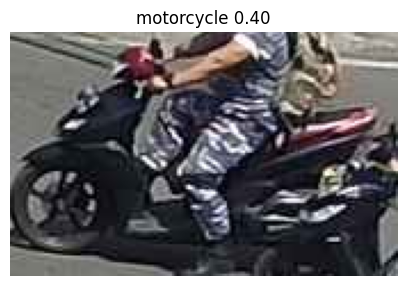

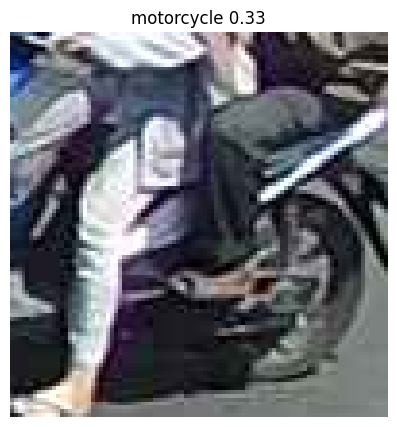

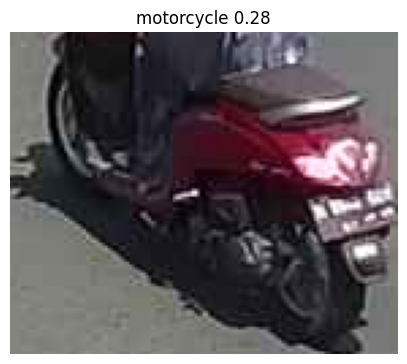

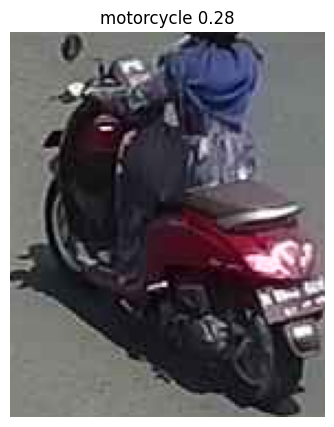

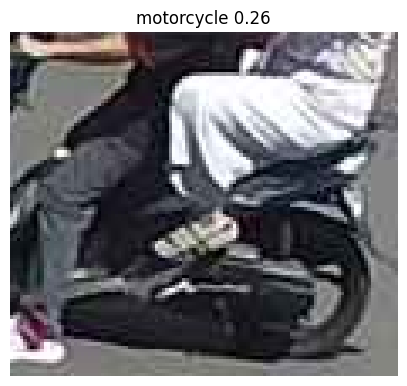

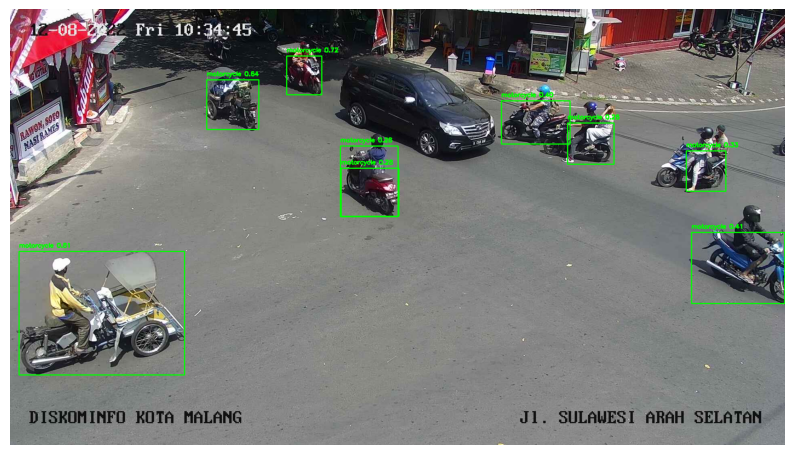


0: 384x640 2 persons, 1 car, 140.9ms
Speed: 4.4ms preprocess, 140.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
No motorcycle detected in the image.


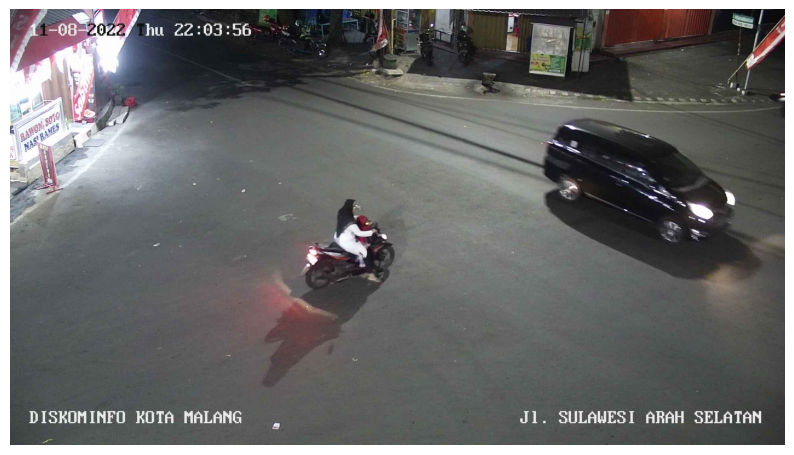

In [ ]:
# Path ke file gambar
day_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/download (48).jpg'
night_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/download (11).jpg'

# Load model YOLOv8 yang sudah dilatih sebelumnya
model = YOLO('yolov8n.pt')

def detect_motor(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Deteksi objek menggunakan YOLOv8
    results = model(image_rgb)

    motor_detected = False  # Flag untuk mengetahui apakah motor terdeteksi atau tidak

    # Visualisasi hasil deteksi
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].cpu().numpy()  # Ambil nilai dari tensor dan konversi ke numpy array
            x1, y1, x2, y2 = map(int, xyxy)
            label = model.names[int(box.cls)]
            confidence = box.conf.item()

            if label == "motorcycle":
                motor_detected = True  # Set flag jika motor terdeteksi

                # Ekstrak objek yang terdeteksi sebagai motorbike
                detected_motor = image_rgb[y1:y2, x1:x2]

                # Tampilkan setiap motorbike yang terdeteksi
                plt.figure(figsize=(5, 5))
                plt.imshow(detected_motor)
                plt.axis('off')
                plt.title(f'{label} {confidence:.2f}')
                plt.show()

    if not motor_detected:
        print("No motorcycle detected in the image.")

    # Tampilkan gambar asli dengan semua deteksi
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = map(int, xyxy)
            label = model.names[int(box.cls)]
            confidence = box.conf.item()

            if label == "motorcycle":
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_rgb, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Tampilkan gambar hasil deteksi dengan semua bounding box
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Deteksi motor pada gambar traffic siang
detect_motor(day_image_path)

# Deteksi motor pada gambar traffic malam
detect_motor(night_image_path)


0: 384x640 5 persons, 4 motorcycles, 1 airplane, 943.4ms
Speed: 7.2ms preprocess, 943.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


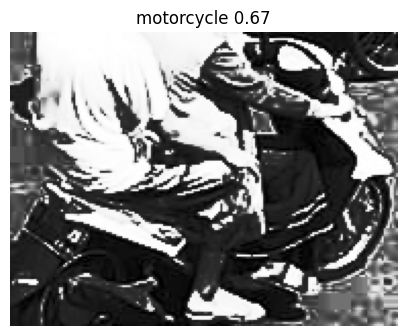

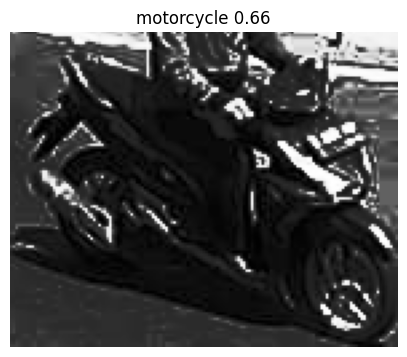

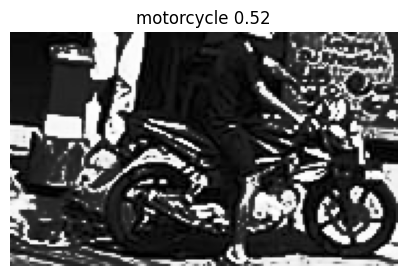

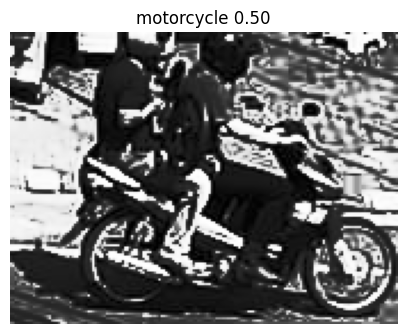

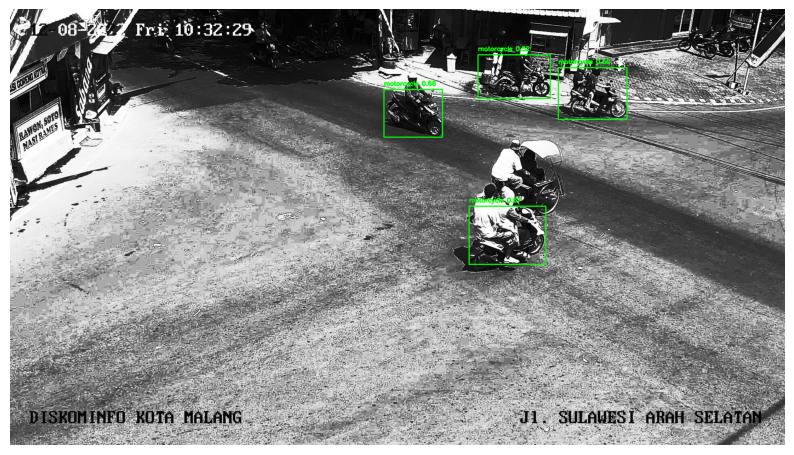


0: 384x640 3 persons, 1 car, 3 motorcycles, 949.8ms
Speed: 3.8ms preprocess, 949.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


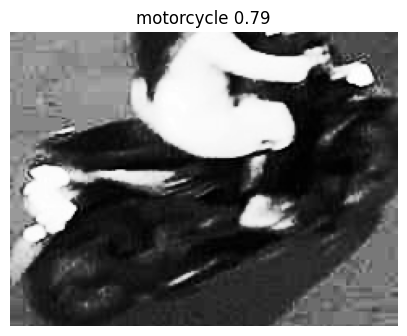

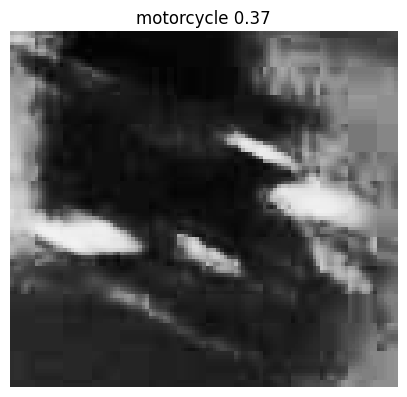

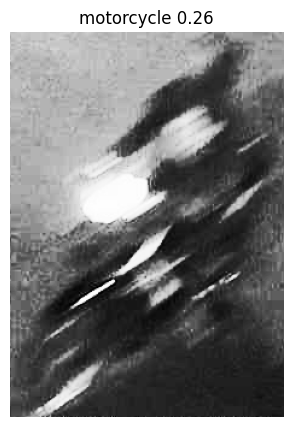

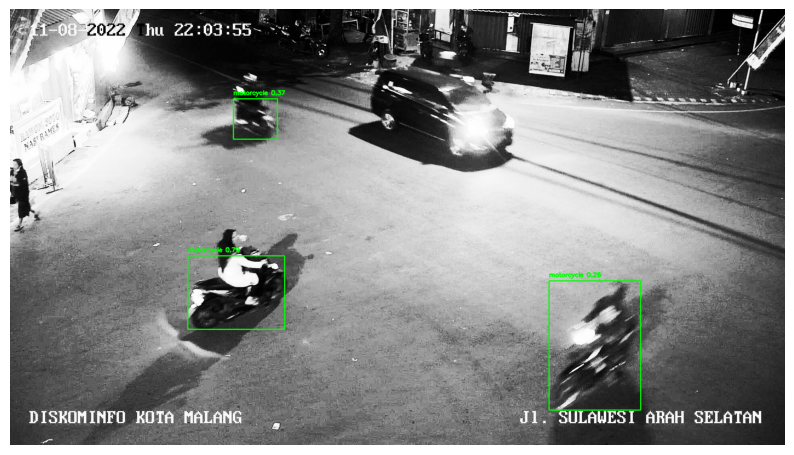

In [ ]:
# Path ke file gambar
day_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_siang/download (37).jpg'
night_image_path = '/content/drive/MyDrive/Pengolahan Citra Digital/dataset/traffic_malam/download (10).jpg'

# Load model YOLOv8 yang lebih besar dan akurat
model = YOLO('yolov8m.pt')  # Coba gunakan yolov8s.pt atau yolov8l.pt jika tersedia

def enhance_image(image):
    # Ubah ke format grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Histogram equalization
    enhanced = cv2.equalizeHist(gray)
    # Konversi kembali ke BGR
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
    return enhanced

def detect_motor(image_path, conf_threshold=0.25):
    # Baca gambar
    image = cv2.imread(image_path)
    # Tingkatkan gambar untuk deteksi yang lebih baik
    enhanced_image = enhance_image(image)
    image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)

    # Deteksi objek menggunakan YOLOv8
    results = model(image_rgb, conf=conf_threshold)

    motor_detected = False  # Flag untuk mengetahui apakah motor terdeteksi atau tidak

    # Visualisasi hasil deteksi
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].cpu().numpy()  # Ambil nilai dari tensor dan konversi ke numpy array
            x1, y1, x2, y2 = map(int, xyxy)
            label = model.names[int(box.cls)]
            confidence = box.conf.item()

            if label == "motorcycle":
                motor_detected = True  # Set flag jika motor terdeteksi

                # Ekstrak objek yang terdeteksi sebagai motorbike
                detected_motor = image_rgb[y1:y2, x1:x2]

                # Tampilkan setiap motorbike yang terdeteksi
                plt.figure(figsize=(5, 5))
                plt.imshow(detected_motor)
                plt.axis('off')
                plt.title(f'{label} {confidence:.2f}')
                plt.show()

    if not motor_detected:
        print("No motorbike detected in the image.")

    # Tampilkan gambar asli dengan semua deteksi
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].cpu().numpy()
            x1, y1, x2, y2 = map(int, xyxy)
            label = model.names[int(box.cls)]
            confidence = box.conf.item()

            if label == "motorcycle":
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_rgb, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Tampilkan gambar hasil deteksi dengan semua bounding box
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Deteksi motor pada gambar traffic siang
detect_motor(day_image_path, conf_threshold=0.25)

# Deteksi motor pada gambar traffic malam
detect_motor(night_image_path, conf_threshold=0.25)